In [323]:
import matplotlib.pyplot as plt
import sympy as sp

# Transformada de Laplace

Si $f(t)$ es una función definida en $[0,\infty[$ con $t$ y $f$ reales, entonces la transformada de Laplace de la función $f$ se denota por $\mathcal{L}\lbrace f(t) \rbrace = F(s)$ y se define como la integral
$$ \mathcal{L}\lbrace f(t) \rbrace = F(s) = \int_{0}^{\infty} f(t) e^{-st} dt $$
siempre que la anterior sea convergente.

Como la transformada de Laplace es una integral, mediante Pyton podríamos querer calcularla directamente, eso podemos hacerlo mediante la función `integrate`. Para ello resolvamos el siguiente ejemplo:

### Ejemplo 01

Integrando, calcular 
$$\mathcal{L}\lbrace t^3 \rbrace = \displaystyle\int_{0}^{\infty} t^3 e^{-st } dt.$$

Para resolver el ejemplo, primero debemos importar las librerias que podremos necesitar:

In [324]:
import sympy as sp
sp.init_printing()
import matplotlib.pyplot as plt
%matplotlib inline
from sympy import integrate, init_printing #importamos paquete para integrar

# definimos algunos objetos con los que queremos trabajar.
t, s = sp.symbols('t, s', positive = True, real=True) #símbolos
a = sp.symbols('a', real=True, positive=True) #símbolo real positivo

#definimos la función con la que queremos trabajar
f = t**3
f #la imprimimos, para verificar

In [325]:
#definimos la función de Laplace
                        #diferencial , cota inferior, cota superior
sp.integrate(f*sp.exp(-s*t), (t, 0, sp.oo))

#Esto resuelve laplace por la definicion.

Para poder trabajar de forma más fluida, `Sympy` tiene una función llamada `laplace_transform` que hace esto de manera eficiente y que también retorna condiciones de convergencia de la integral:

## `laplace_transform( )`

### Ejemplo 02

Usemos la función `laplace_transform( )` para calcular la misma Transformada de Laplace anterior:

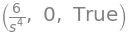

In [326]:
from sympy import laplace_transform

sp.laplace_transform(f, t, s)

Si deseamos solo la función sin importar las condiciones de convergencia, agregamos `noconds=True`:

In [327]:
sp.laplace_transform(f, t, s, noconds=True)

Python también tiene la función

## `inverse_laplace_transform( )`

### Ejemplo 03

Calcule la transformada inversa de la función $\frac{6}{s^4}$.

Para ello definimos $F$ en base al cálculo anterior:

In [328]:
F = sp.laplace_transform(f, t, s, noconds=True)
F

Ahora calculamos la inversa solicitada:

In [329]:
sp.inverse_laplace_transform(F, s, t)

## ¿Qué es $\theta$?

Es la función paso unitario, también conocida como la función de Heaviside. Esta función la encontraremos a menudo al trabajar con la inversa de Laplace. Mediante Sympy la podemos llamar como:

In [330]:
sp.Heaviside(t)

Y gráficamente es:

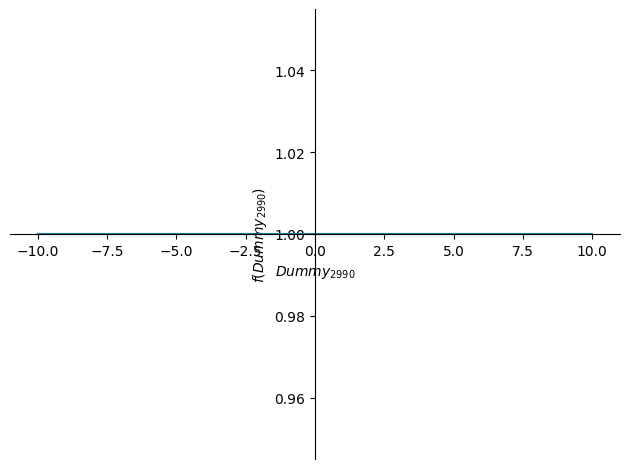

In [331]:
sp.plot(sp.Heaviside(t))

### Ejemplo 04

Calcule la Transformada de Laplace de $\sin(t) $.

Definimos primero la función $ f(t) = \sin(t) $ en `SymPy`. Luego usamos la función `laplace_transform` para encontrar su transformada.

Recordemos que la Transformada de Laplace de $ \sin(at) $ es:

$$ \mathcal{L}\lbrace \sin(at) \rbrace = \frac{a}{s^2 + a^2} $$

In [332]:
f_sin = sp.sin(a*t)
laplace_transform(f_sin, t, s, noconds=True)

## Ejercicios:

### Ejercicio 01

Calcular transformada de Laplace de $f(t)=\cos t$ y de $g(t)=\cosh(2t)$

In [333]:
f_cos = sp.cos(t)
laplace_transform(f_cos, t, s, noconds=True)

In [334]:
f_cosh = sp.cosh(2*t)
laplace_transform(f_cosh, t, s, noconds=True)

### Ejericicio 02
Calcular la transformada inversa de Laplace $F(s)= \dfrac{1}{s}$

In [335]:
F = 1/s
sp.inverse_laplace_transform(F, s, t)

### Ejericicio 03

Calcular transformada de Laplace de $f(t)=e^{-\alpha t}$ con $\alpha \in \mathbb{R}^+$. Utilice su resultado para calcular su inversa.

### Ejericicio 04

Calcular la transformada de Laplace de 
$$ g(t) = \cos At + t\sin Bt, $$
con $A,B \in \mathbb{R}$

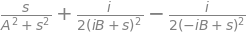

In [341]:
A , B = sp.symbols('A B', real=True, positive = True) #símbolo real positivo
f = sp.cos(A*t) + t*sp.sin(B*t)
sp.laplace_transform(f, t, s, noconds=True, real=True)


In [342]:
cos = sp.cos(A*t)
sp.laplace_transform(cos, t, s, noconds=True, real=True)

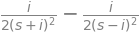

In [346]:
sin = t*sp.sin(t)
sp.laplace_transform(sin, t, s, noconds=True, real=True)

### Ejericicio 05
Suponga que $f:[0,\infty[ \to \mathbb{R}$ es continua por partes y de orden exponencial (posee transformada de Laplace). Verifique que:

$$\mathcal{L}\lbrace t f(t) \rbrace = -\dfrac{d}{ds}\left[ f(t) \right]$$

para una función $f$ a elección.

### Ejericicio 06

Calcular la transformada de Laplace inversa de 
$$ H(s) = \dfrac{(s+1)(s-1)}{(s+4)^2} $$

In [338]:
Hs = ((s+1)*(s-1))/((s+4)**2)
resultado = sp.inverse_laplace_transform(Hs, s, t)


In [339]:
hola = laplace_transform(resultado, t, s, noconds=True)

In [340]:
hola == resultado

False